In [1]:
!python --version

Python 3.10.14


```text
matplotlib                3.8.0
pandas                    1.5.3
seaborn                   0.11.2
```

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('data.csv')
df

,Model,Modality,Acceleration Rate,SSIM
0,AFT-Net (I),T2w on 1.5T,2x,0.971661
1,AFT-Net (I),T2w on 1.5T,2x,0.970745
2,AFT-Net (I),T2w on 1.5T,2x,0.970507
3,AFT-Net (I),T2w on 1.5T,2x,0.952608
4,AFT-Net (I),T2w on 1.5T,2x,0.960793
...,...,...,...,...
1195,AFT-Net (KI),T1w on 3T,16x,0.883790
1196,AFT-Net (KI),T1w on 3T,16x,0.840894
1197,AFT-Net (KI),T1w on 3T,16x,0.914624
1198,AFT-Net (KI),T1w on 3T,16x,0.914678


In [4]:
plt.rcdefaults()
custom_rcParams = {
    'axes.linewidth': 1.6,
    'font.family': ['Arial'],
    'font.size': 20,
    'legend.fontsize': 18,
    'lines.linewidth': 1.5
}
for k, v in custom_rcParams.items():
    print(f'{k:>16s}: {str(plt.rcParams[k]):>16s} -> {str(v):>16s}')
plt.rcParams.update(custom_rcParams)

  axes.linewidth:              0.8 ->              1.6
     font.family:   ['sans-serif'] ->        ['Arial']
       font.size:             10.0 ->               20
 legend.fontsize:           medium ->               18
 lines.linewidth:              1.5 ->              1.5


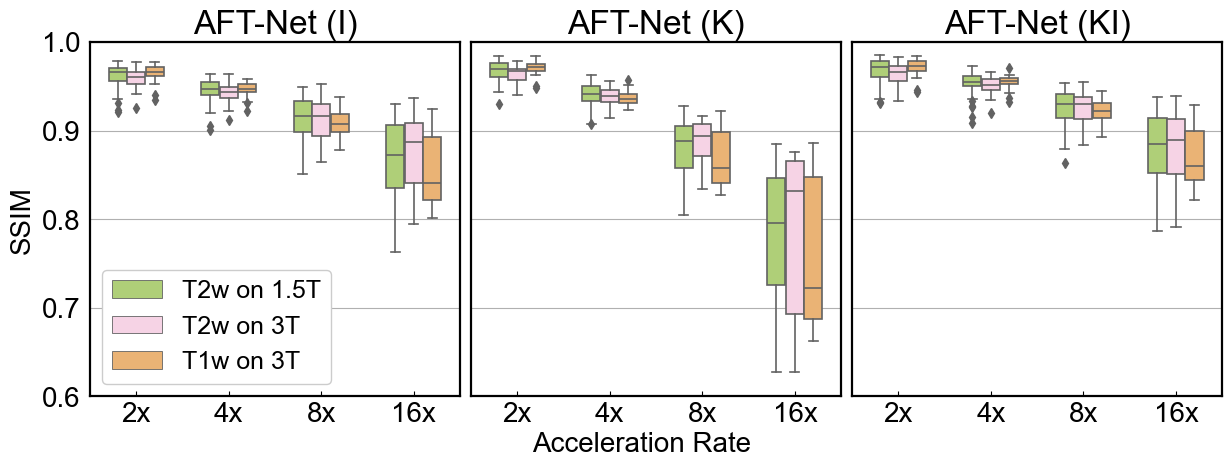

In [5]:
palette = {
    'T1w on 3T': plt.cm.Set3(5),
    'T2w on 1.5T': plt.cm.Set3(6),
    'T2w on 3T': plt.cm.Set3(7)
}

# create fig
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
axs: list[plt.Axes]
fig.tight_layout(pad=0, w_pad=-1)

for ax, model in zip(axs, df['Model'].unique()):
    # plot
    sns.boxplot(
        data=df[df['Model']==model],
        x='Acceleration Rate',
        y='SSIM',
        hue='Modality',
        palette=palette,
        width=0.6,
        linewidth=1.2,
        ax=ax,
        showfliers=True
    )
    ax.get_legend().remove()
    ax.grid(axis='y')
    ax.set_axisbelow(True)
    ax.set_title(model)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(left=False)
    ax.tick_params(axis='x', direction='in')

# legend
axs[0].legend()
axs[0].get_legend().set_title('')
axs[0].legend(loc='lower left', framealpha=1)

axs[0].set_ylabel('SSIM')

# set ytick
axs[0].set_ylim(top=1)
axs[0].set_yticks([.6, .7, .8, .9, 1])
fig.text(0.5, -0.05, 'Acceleration Rate', ha='center')

# save
fig.savefig('output.png', transparent=True,
            bbox_inches='tight', pad_inches=.1, dpi=200)